<a href="https://colab.research.google.com/github/cybertraining-dsc/fa20-523-312/blob/main/project/code/toxicologyASV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Big-data analysis framework for Toxicological Study**

The tasks below is carried out for the USGS data related to: *"USGS 03275500 EAST FORK WHITEWATER RIVER AT RICHMOND, IN"*.

The coding framework uses USGS-data that was collected continuously from November 1 till November 14 for the four specific years - 2017, 2018, 2019, and 2020.

In [17]:
#  Name: Saptarshi Sinha
#  Date since last updated: 11/18/2020
#  ENGR-E 534: Project - Aquatic Toxicity Analysis with the aid of Autonomous Surface Vehicle (ASV)
#  Description: Implementation of a pythonic coding framework for analyzing the USGS database for an aquatic toxicological study
#  IMPORTANT INSTRUCTION: The following code assumes all applicable packages/libraries are pre-installed.


In [18]:
! python --version

Python 3.6.9


In [19]:
! pip install cloudmesh-common -U
! pip install -q seaborn

Requirement already up-to-date: cloudmesh-common in /usr/local/lib/python3.6/dist-packages (4.3.26)


In [20]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from pandas import Series, DataFrame
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from google.colab import drive
from cloudmesh.common.StopWatch import StopWatch
from cloudmesh.common.Benchmark import Benchmark

In [21]:
# Improve readability of Numpy outputs
np.set_printoptions(precision=3, suppress=True)

print(tf.__version__)
#drive.mount('/drive')

2.3.0


############################
## I. Fetch Data (1st bm) ##
############################

In [22]:
#def download(url, filename):
   #NOTE: This section is not being currently used as data is only being read from an external website. It is not downloaded at all!
   #if filename already there:
   #    skip
   #else:
   #    download from url and store into filename
   #pass

Benchmark.Start()

columns = ['Temperature', 'Sp. Conductance', 'pH', 'Dissolved O2']


def fetchwebdata(url):
  # loading the USGS database(s) as panda data-frames  
  #df = pd.read_csv(url, skiprows = 31, sep = "\t", header = None)
  df = pd.read_csv(url, skiprows = 34, sep = "\t", header = None)
  param_df = df[[4,6,8,10]]
  param_df.columns = columns
  param_df.isna().sum()          #checking
  param_df = param_df.dropna()   #drop, if found
  print(param_df)
  print()
  return param_df


url_Nov2017 = "https://nwis.waterdata.usgs.gov/usa/nwis/uv/?cb_00010=on&cb_00095=on&cb_00300=on&cb_00400=on&format=rdb&site_no=03275500&period=&begin_date=2017-11-01&end_date=2017-11-14"
url_Nov2018 = "https://nwis.waterdata.usgs.gov/usa/nwis/uv/?cb_00010=on&cb_00095=on&cb_00300=on&cb_00400=on&format=rdb&site_no=03275500&period=&begin_date=2018-11-01&end_date=2018-11-14"
url_Nov2019 = "https://nwis.waterdata.usgs.gov/usa/nwis/uv/?cb_00010=on&cb_00095=on&cb_00300=on&cb_00400=on&format=rdb&site_no=03275500&period=&begin_date=2019-11-01&end_date=2019-11-14"
url_Nov2020 = "https://waterdata.usgs.gov/nwis/uv?cb_00010=on&cb_00095=on&cb_00300=on&cb_00400=on&format=rdb&site_no=03275500&period=&begin_date=2020-11-01&end_date=2020-11-14"

water_param_2017 = fetchwebdata(url_Nov2017)
water_param_2018 = fetchwebdata(url_Nov2018) 
water_param_2019 = fetchwebdata(url_Nov2019) 
water_param_2020 = fetchwebdata(url_Nov2020) 

# imputing missing values of a particular column 'x' with the mean of non-NaN values of the same column 
## mean_x = param_df["x"].mean()
## filled_df = param_df.fillna(mean_x)

time.sleep(5)
Benchmark.Stop()
  

      Temperature  Sp. Conductance   pH  Dissolved O2
0             6.8            689.0  8.2          10.8
1             6.8            688.0  8.2          10.7
2             6.8            687.0  8.2          10.8
3             6.8            689.0  8.2          10.7
4             6.8            688.0  8.2          10.7
...           ...              ...  ...           ...
1250          7.7            625.0  8.3          11.3
1251          7.7            626.0  8.3          11.3
1252          7.7            626.0  8.3          11.4
1253          7.6            626.0  8.3          11.4
1254          7.6            626.0  8.3          11.4

[1150 rows x 4 columns]

      Temperature  Sp. Conductance   pH  Dissolved O2
0            12.5            641.0  8.2           9.2
1            12.4            637.0  8.2           9.3
2            12.4            635.0  8.2           9.3
3            12.4            632.0  8.2           9.3
4            12.4            632.0  8.2           9.3
..

In [23]:
Benchmark.print()


+---------------------+------------------------------------------------------------------+
| Attribute           | Value                                                            |
|---------------------+------------------------------------------------------------------|
| BUG_REPORT_URL      | "https://bugs.launchpad.net/ubuntu/"                             |
| DISTRIB_CODENAME    | bionic                                                           |
| DISTRIB_DESCRIPTION | "Ubuntu 18.04.5 LTS"                                             |
| DISTRIB_ID          | Ubuntu                                                           |
| DISTRIB_RELEASE     | 18.04                                                            |
| HOME_URL            | "https://www.ubuntu.com/"                                        |
| ID                  | ubuntu                                                           |
| ID_LIKE             | debian                                                           

###################################################################
## II. Analyze stastical information & Plot Prelim data (2nd bm) ##
###################################################################

The standard deviations for this particular year are:
Temperature          2.528830
Sp. Conductance    118.493238
pH                   0.092095
Dissolved O2         0.834011
dtype: float64

Median Temperature value is: 10.4
Median Specific Conductance value is: 590.0
Median pH value is: 8.2
Median Dissolved-Oxygen value is: 10.850000000000001
The standard deviations for this particular year are:
Temperature          1.902926
Sp. Conductance    163.961406
pH                   0.110894
Dissolved O2         0.625189
dtype: float64

Median Temperature value is: 9.5
Median Specific Conductance value is: 544.0
Median pH value is: 8.3
Median Dissolved-Oxygen value is: 11.1
The standard deviations for this particular year are:
Temperature         2.579231
Sp. Conductance    26.784352
pH                  0.102532
Dissolved O2        1.763901
dtype: float64

Median Temperature value is: 7.3
Median Specific Conductance value is: 697.0
Median pH value is: 8.3
Median Dissolved-Oxygen value is: 12.1

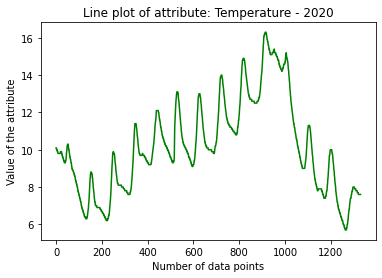

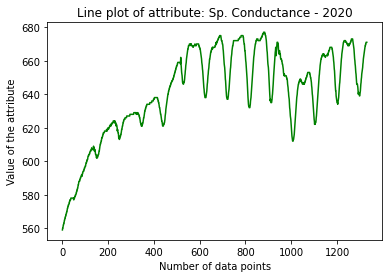

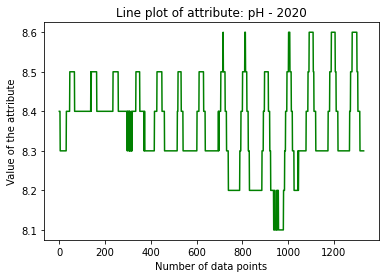

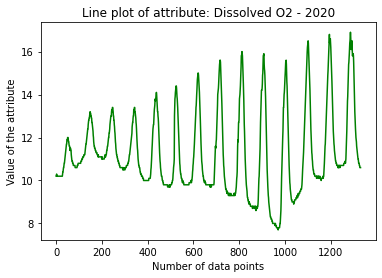

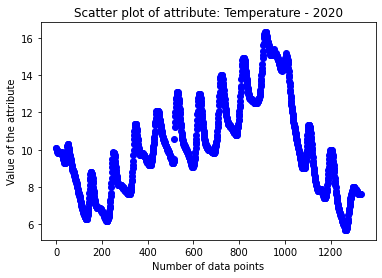

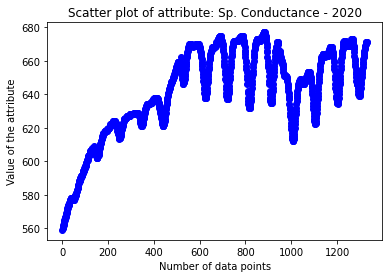

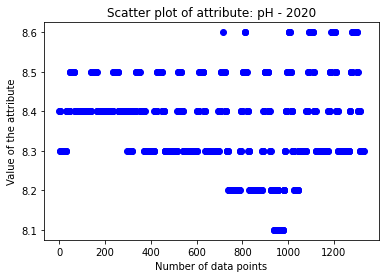

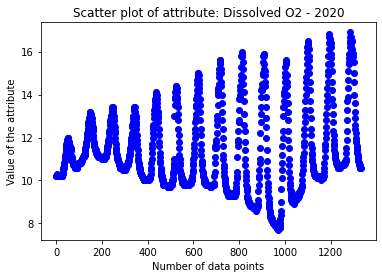

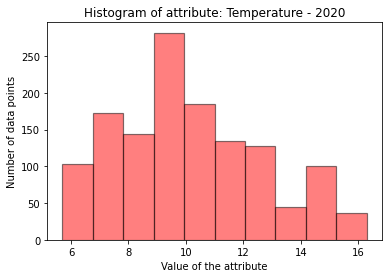

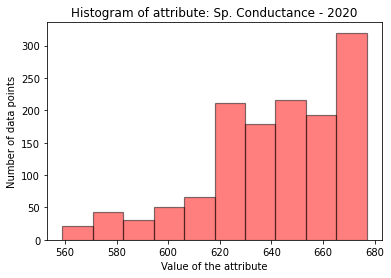

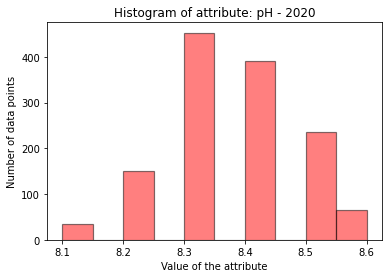

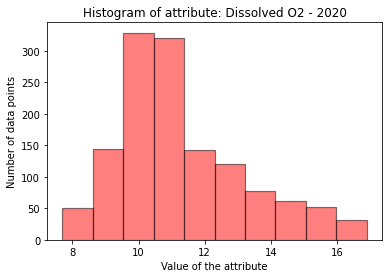

In [24]:
Benchmark.Start()

def getstats(water_param_year):
    
    # running basic statistical operations
    data_deviations = water_param_year.std()
    print("The standard deviations for this particular year are:")
    print(data_deviations)
    print()
    
    t_med = water_param_year["Temperature"].median()
    print("Median Temperature value is:", t_med)
    c_med = water_param_year["Sp. Conductance"].median()
    print("Median Specific Conductance value is:", c_med)
    p_med = water_param_year["pH"].median()
    print("Median pH value is:", p_med)
    d_med = water_param_year["Dissolved O2"].median()
    print("Median Dissolved-Oxygen value is:", d_med)
     
    return (data_deviations, t_med, c_med, p_med, d_med)


(std_2017, med_temp_2017, med_cond_2017, med_ph_2017, med_oxy_2017) = getstats(water_param_2017)
(std_2018, med_temp_2018, med_cond_2018, med_ph_2018, med_oxy_2018) = getstats(water_param_2018)
(std_2019, med_temp_2019, med_cond_2019, med_ph_2019, med_oxy_2019) = getstats(water_param_2019)
(std_2020, med_temp_2020, med_cond_2020, med_ph_2020, med_oxy_2020) = getstats(water_param_2020)

 
#x_data = list(range(0,1040,1));
#y1_data = param_df["Temperature"];
#y2_data = param_df["Sp. Conductance"];
#y3_data = param_df["pH"];
#y4_data = param_df["Dissolved O2"];


def displayplots(water_param_year, size, year):

    for j in columns:
      x_data = list(range(0,size,1));
      fig = plt.figure()
      sp = fig.add_subplot(1, 1, 1)
      sp.set_title("Line plot of attribute: " + str(j) + " - " + year, fontsize = 12)
      sp.set_ylabel("Value of the attribute")
      sp.set_xlabel("Number of data points")
      sp.plot(x_data, water_param_year[j], color = "green", label='Data')
      #sp.scatter(x_data, param_df[j], color = "blue", label='Data')
      #sp.hist(param_df[j], bins = 10, color = "red", edgecolor='black', linewidth=1.2, alpha = 0.5)
          
    for j in columns:
      x_data = list(range(0,size,1));
      fig = plt.figure()
      sp = fig.add_subplot(1, 1, 1)
      sp.set_title("Scatter plot of attribute: " + str(j) + " - " + year, fontsize = 12)
      sp.set_ylabel("Value of the attribute")
      sp.set_xlabel("Number of data points")
      #sp.plot(x_data, param_df[j], color = "green", label='Data')
      sp.scatter(x_data, water_param_year[j], color = "blue", label='Data')
      #sp.hist(param_df[j], bins = 10, color = "red", edgecolor='black', linewidth=1.2, alpha = 0.5)
          
    for j in columns:
      x_data = list(range(0,size,1));
      fig = plt.figure()
      sp = fig.add_subplot(1, 1, 1)
      sp.set_title("Histogram of attribute: " + str(j) + " - " + year, fontsize = 12)
      sp.set_xlabel("Value of the attribute")
      sp.set_ylabel("Number of data points")
      #sp.plot(x_data, param_df[j], color = "green", label='Data')
      #sp.scatter(x_data, param_df[j], color = "blue", label='Data')
      sp.hist(water_param_year[j], bins = 10, color = "red", edgecolor='black', linewidth=1.2, alpha = 0.5)


#displayplots(water_param_2017, 1150, "2017") # number of data-points obtained in 2017 was 1150
#displayplots(water_param_2018, 1042, "2018") # number of data-points obtained in 2018 was 1042
#displayplots(water_param_2019, 1329, "2019") # number of data-points obtained in 2019 was 1329
displayplots(water_param_2020, 1331, "2020") # number of data-points obtained in 2020 was 1331


time.sleep(5)
Benchmark.Stop()


In [25]:
Benchmark.print()


+---------------------+------------------------------------------------------------------+
| Attribute           | Value                                                            |
|---------------------+------------------------------------------------------------------|
| BUG_REPORT_URL      | "https://bugs.launchpad.net/ubuntu/"                             |
| DISTRIB_CODENAME    | bionic                                                           |
| DISTRIB_DESCRIPTION | "Ubuntu 18.04.5 LTS"                                             |
| DISTRIB_ID          | Ubuntu                                                           |
| DISTRIB_RELEASE     | 18.04                                                            |
| HOME_URL            | "https://www.ubuntu.com/"                                        |
| ID                  | ubuntu                                                           |
| ID_LIKE             | debian                                                           

#####################################
## III. K-means: Centroid (3rd bm) ##
#####################################

In [26]:
Benchmark.Start()

def findcentroids(water_param_year):
    
    (std, t_med, c_med, p_med, d_med) = getstats(water_param_year)    
    mu_safe = [(t_med - (1*std[0])), (c_med - (1*std[1])), (p_med + (1*std[2])), (d_med + (1*std[3]))]
    mu_unsafe = [(t_med + (1*std[0])), (c_med + (1*std[1])), (p_med - (1*std[2])), (d_med - (1*std[3]))]
    #extreme or slight variations

    columns = ['Temperature', 'Sp. Conductance', 'pH', 'Dissolved O2']
    water_param = water_param_year[columns]
    iterations = 0
        
    while True:
            
        water_param = water_param[columns]
        ED_mu_safe = (((water_param - mu_safe)**2).sum(axis = 1)**0.5) # Euclidean distance calculation for mu2
        ED_mu_unsafe = (((water_param - mu_unsafe)**2).sum(axis = 1)**0.5) # Euclidean distance calculation for mu4
        water_param["Dist mu_safe"] = ED_mu_safe                       # Append new column for Euclidean distance values of sample points from Centroid mu2
        water_param["Dist mu_unsafe"] = ED_mu_unsafe                     # Append new column for Euclidean distance values of sample points from Centroid mu4 
        water_param["Predicted_Class"] = 2                     # Append new column for Predicted Class with initial values of 2
        water_param.loc[(water_param["Dist mu_safe"] < water_param["Dist mu_unsafe"]), "Predicted_Class"] = 0 # Assign Class 0, if the sample point is closer to "Safe Centroid" 
        water_param.loc[(water_param["Dist mu_safe"] > water_param["Dist mu_unsafe"]), "Predicted_Class"] = 1 # Assign Class 1, if the sample point is closer to "Unsafe Centroid"
        cluster_mu_safe = water_param[water_param["Predicted_Class"] == 0]      # Sample points assigned to Cluster 0
        cluster_mu_unsafe = water_param[water_param["Predicted_Class"] == 1]      # Sample points assigned to Cluster 1
        # New Centroid mu2 value
        new_mu_safe = [round((cluster_mu_safe["Temperature"].mean()), 6), round((cluster_mu_safe["Sp. Conductance"].mean()), 6), round((cluster_mu_safe["pH"].mean()), 6), round((cluster_mu_safe["Dissolved O2"].mean()), 6)]
        # New Centroid mu4 value
        new_mu_unsafe = [round((cluster_mu_unsafe["Temperature"].mean()), 6), round((cluster_mu_unsafe["Sp. Conductance"].mean()), 6), round((cluster_mu_unsafe["pH"].mean()), 6), round((cluster_mu_unsafe["Dissolved O2"].mean()), 6)]
            
        # update the number of iterations
        iterations += 1
            
        # check the status of Centroid values and the number of iterations
        # either break out of the loop, or update centroids and continue to next iteration
        if ((iterations >= 50) or ((new_mu_safe == mu_safe) and (new_mu_unsafe == mu_unsafe))):
            break
        else:
            mu_safe = new_mu_safe
            mu_unsafe = new_mu_unsafe

    return (iterations, new_mu_safe, new_mu_unsafe, cluster_mu_safe, cluster_mu_unsafe, water_param)
    # (1) iterations
    # (2) new_mu_safe & unsafe
    # (2) cluster_mu_safe & unsafe
    # (1) water_param

    
(itr2017, musafe2017, muunsafe2017, safecluster2017, unsafecluster2017, new_water_param_2017) = findcentroids(water_param_2017)
(itr2018, musafe2018, muunsafe2018, safecluster2018, unsafecluster2018, new_water_param_2018) = findcentroids(water_param_2018)
(itr2019, musafe2019, muunsafe2019, safecluster2019, unsafecluster2019, new_water_param_2019) = findcentroids(water_param_2019)
(itr2020, musafe2020, muunsafe2020, safecluster2020, unsafecluster2020, new_water_param_2020) = findcentroids(water_param_2020)

time.sleep(5)
Benchmark.Stop()


The standard deviations for this particular year are:
Temperature          2.528830
Sp. Conductance    118.493238
pH                   0.092095
Dissolved O2         0.834011
dtype: float64

Median Temperature value is: 10.4
Median Specific Conductance value is: 590.0
Median pH value is: 8.2
Median Dissolved-Oxygen value is: 10.850000000000001
The standard deviations for this particular year are:
Temperature          1.902926
Sp. Conductance    163.961406
pH                   0.110894
Dissolved O2         0.625189
dtype: float64

Median Temperature value is: 9.5
Median Specific Conductance value is: 544.0
Median pH value is: 8.3
Median Dissolved-Oxygen value is: 11.1
The standard deviations for this particular year are:
Temperature         2.579231
Sp. Conductance    26.784352
pH                  0.102532
Dissolved O2        1.763901
dtype: float64

Median Temperature value is: 7.3
Median Specific Conductance value is: 697.0
Median pH value is: 8.3
Median Dissolved-Oxygen value is: 12.1

In [27]:
Benchmark.print()


+---------------------+------------------------------------------------------------------+
| Attribute           | Value                                                            |
|---------------------+------------------------------------------------------------------|
| BUG_REPORT_URL      | "https://bugs.launchpad.net/ubuntu/"                             |
| DISTRIB_CODENAME    | bionic                                                           |
| DISTRIB_DESCRIPTION | "Ubuntu 18.04.5 LTS"                                             |
| DISTRIB_ID          | Ubuntu                                                           |
| DISTRIB_RELEASE     | 18.04                                                            |
| HOME_URL            | "https://www.ubuntu.com/"                                        |
| ID                  | ubuntu                                                           |
| ID_LIKE             | debian                                                           

########################################
## IV: Print results & Plots (4th bm) ##
########################################

Program ended after 10 iterations!

Final centroid mu_safe:
Temperature         13.568345
Sp. Conductance    279.784173
pH                   8.024460
Dissolved O2        10.035971
dtype: float64

Final centroid mu_unsafe:
Temperature          9.530762
Sp. Conductance    586.958457
pH                   8.211375
Dissolved O2        11.031157
dtype: float64

Final cluster assignment:

      Temperature  Sp. Conductance   pH  Dissolved O2  Predicted_Class
0             6.8            689.0  8.2          10.8                1
1             6.8            688.0  8.2          10.7                1
2             6.8            687.0  8.2          10.8                1
3             6.8            689.0  8.2          10.7                1
4             6.8            688.0  8.2          10.7                1
...           ...              ...  ...           ...              ...
1250          7.7            625.0  8.3          11.3                1
1251          7.7            626.0  8.3        

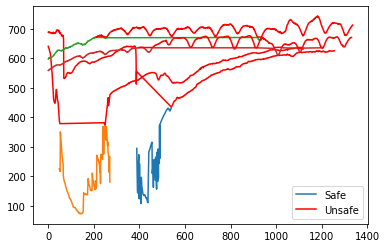

In [28]:
Benchmark.Start()

def results(iterations, new_mu_safe, new_mu_unsafe, water_param, cluster_mu_safe, cluster_mu_unsafe):
    
    columns = ['Temperature', 'Sp. Conductance', 'pH', 'Dissolved O2']
    print("Program ended after", iterations, "iterations!")
    print()
    c_safe = pd.Series(new_mu_safe, index = columns)
    print("Final centroid mu_safe:")
    print(c_safe)
    print()
    c_unsafe = pd.Series(new_mu_unsafe, index = columns)
    print("Final centroid mu_unsafe:")
    print(c_unsafe)
    print()
    print("Final cluster assignment:")
    print()
    #print(water_param)
    #water_param.to_csv('wp_labelled_2std.csv') 
    water_para = water_param[["Temperature", "Sp. Conductance", "pH", "Dissolved O2", "Predicted_Class"]]
    #water_para.to_csv('/drive/My Drive/ColabDownloads/wp_labelled_2std.csv')
    #water_para.to_csv('wp_labelled_2std.csv') 
    print(water_para)
    
    ####    
    safedp = cluster_mu_safe.iloc[:,0:4]
    unsafedp = cluster_mu_unsafe.iloc[:,0:4]
        
    #plots
    ax = plt.gca()
    safedp.plot(kind='line',y='Sp. Conductance',use_index=True,ax=ax)
    unsafedp.plot(kind='line',y='Sp. Conductance',use_index=True,color='red',ax=ax)
    ax.legend(["Safe","Unsafe"])
        
    #ax = plt.gca()
    #safedp.plot(kind='line',y='Temperature',use_index=True,ax=ax)
    #unsafedp.plot(kind='line',y='Temperature',use_index=True,color='red',ax=ax)
    #ax.legend(["Safe","Unsafe"])
        
    #ax = plt.gca()
    #safedp.plot(kind='line',y='pH',use_index=True,ax=ax)
    #unsafedp.plot(kind='line',y='pH',use_index=True,color='red',ax=ax)
    #ax.legend(["Safe","Unsafe"])
        
    #ax = plt.gca()
    #safedp.plot(kind='line',y='Dissolved O2',use_index=True,ax=ax)
    #unsafedp.plot(kind='line',y='Dissolved O2',use_index=True,color='red',ax=ax)
    #ax.legend(["Safe","Unsafe"])
    
    return (c_safe, c_unsafe)


(centsafe17, centunsafe17) = results(itr2017, musafe2017, muunsafe2017, new_water_param_2017, safecluster2017, unsafecluster2017)
(centsafe18, centunsafe18) = results(itr2018, musafe2018, muunsafe2018, new_water_param_2018, safecluster2018, unsafecluster2018)
(centsafe19, centunsafe19) = results(itr2019, musafe2019, muunsafe2019, new_water_param_2019, safecluster2019, unsafecluster2019)
(centsafe20, centunsafe20) = results(itr2020, musafe2020, muunsafe2020, new_water_param_2020, safecluster2020, unsafecluster2020)

time.sleep(5)
Benchmark.Stop()


In [29]:
Benchmark.print()


+---------------------+------------------------------------------------------------------+
| Attribute           | Value                                                            |
|---------------------+------------------------------------------------------------------|
| BUG_REPORT_URL      | "https://bugs.launchpad.net/ubuntu/"                             |
| DISTRIB_CODENAME    | bionic                                                           |
| DISTRIB_DESCRIPTION | "Ubuntu 18.04.5 LTS"                                             |
| DISTRIB_ID          | Ubuntu                                                           |
| DISTRIB_RELEASE     | 18.04                                                            |
| HOME_URL            | "https://www.ubuntu.com/"                                        |
| ID                  | ubuntu                                                           |
| ID_LIKE             | debian                                                           

#####################################################
## V. Analysis of Sample & plot heat-maps (5th bm) ##
#####################################################

Enter the value for Temperature field: 12
Enter the value for Specific Conductance field: 675
Enter the value for pH field: 7.8
Enter the value for Dissolved Oxygen field: 10.7
The given sample may not be environmentally safe as it deviates from normal standards.

Critical Category - Level 1


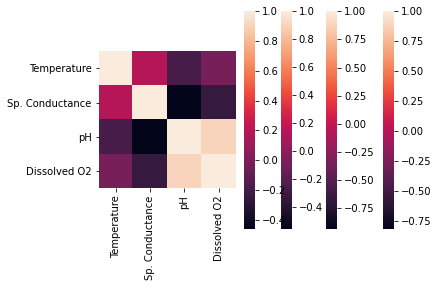

In [30]:
Benchmark.Start()

def heatmap(water_param_year):
    water_para_only_year = water_param_year[["Temperature", "Sp. Conductance", "pH", "Dissolved O2"]]
    corr_wpo_year = water_para_only_year.corr()
    sns.heatmap(corr_wpo_year, square = True)
    return


heatmap(new_water_param_2017)
heatmap(new_water_param_2018)
heatmap(new_water_param_2019)
heatmap(new_water_param_2020)

# Mean of Centroid values over last four years
centsafe_avg = (centsafe17 + centsafe18 + centsafe19 + centsafe20)/4.0
centunsafe_avg = (centunsafe17 + centunsafe18 + centunsafe19 + centunsafe20)/4.0

sample_temp = eval(input("Enter the value for Temperature field: "))
sample_cond = eval(input("Enter the value for Specific Conductance field: "))
sample_ph = eval(input("Enter the value for pH field: "))
sample_dox = eval(input("Enter the value for Dissolved Oxygen field: "))


# Euclidean Distance ....

temp_safedist = abs(sample_temp - centsafe_avg[0])
temp_unsafedist = abs(sample_temp - centunsafe_avg[0])
temp_bool = (temp_unsafedist < temp_safedist)

cond_safedist = abs(sample_cond - centsafe_avg[1])
cond_unsafedist = abs(sample_cond - centunsafe_avg[1])
cond_bool = (cond_unsafedist < cond_safedist)

ph_safedist = abs(sample_ph - centsafe_avg[2])
ph_unsafedist = abs(sample_ph - centunsafe_avg[2])
ph_bool = (ph_unsafedist < ph_safedist)

dox_safedist = abs(sample_dox - centsafe_avg[3])
dox_unsafedist = abs(sample_dox - centunsafe_avg[3])
dox_bool = (dox_unsafedist < dox_safedist)

bool_list = [temp_bool, cond_bool, ph_bool, dox_bool]
true_bools = sum(bool_list)

safe_totaldist = (((temp_safedist**2) + (cond_safedist**2) + (ph_safedist**2) + (dox_safedist**2))**0.5)
unsafe_totaldist = (((temp_unsafedist**2) + (cond_unsafedist**2) + (ph_unsafedist**2) + (dox_unsafedist**2))**0.5)

if (safe_totaldist < unsafe_totaldist):
    print("The given sample is environmentally safe and consistent with normal standards.")
else:
    print("The given sample may not be environmentally safe as it deviates from normal standards.")
    print()
    if true_bools == 1:
        print("Critical Category - Level 1")
    if true_bools == 2:
        print("Critical Category - Level 2")
    if true_bools == 3:
        print("Critical Category - Level 3")
    if true_bools == 4:
        print("Critical Category - Level 4")
    

time.sleep(5)
Benchmark.Stop()


In [31]:
Benchmark.print()


+---------------------+------------------------------------------------------------------+
| Attribute           | Value                                                            |
|---------------------+------------------------------------------------------------------|
| BUG_REPORT_URL      | "https://bugs.launchpad.net/ubuntu/"                             |
| DISTRIB_CODENAME    | bionic                                                           |
| DISTRIB_DESCRIPTION | "Ubuntu 18.04.5 LTS"                                             |
| DISTRIB_ID          | Ubuntu                                                           |
| DISTRIB_RELEASE     | 18.04                                                            |
| HOME_URL            | "https://www.ubuntu.com/"                                        |
| ID                  | ubuntu                                                           |
| ID_LIKE             | debian                                                           